In [1]:
import importlib

from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)


%matplotlib inline
import tensorflow as tf

from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3, ForcedDiversityBootstrapThroughTime

# Linear

In [2]:
num_meta_epochs = 3#100#10
num_epochs = 10#50#15#50
seed = 4200
num_samples = 150

model_params = {'num_epochs':num_epochs,'seed':seed,'initialisation_scheme':tf.keras.initializers.he_normal}

dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10, 10,10]
num_neurons_nonlinear = [10,10,10,10,5]

activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,
                'num_epochs':num_epochs,'seed':seed}

experiment started at 2018-08-08 23:13:23.234131
experiment number 1 took 28.52907681465149 seconds. That means the whole run will probably take 85.58723044395447 more seconds and 1.4264538407325744 more minutes.
overall, it took 89.94786930084229 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   3.313664e-10  0.266667  1.675310  0.007905
std    5.725210e-10  0.058794  0.118459  0.000962
min    5.010088e-13  0.222222  1.593231  0.007103
25%    8.212797e-13  0.233333  1.607409  0.007373
50%    1.141551e-12  0.244444  1.621588  0.007642
75%    4.967991e-10  0.288889  1.716349  0.008307
max    9.924566e-10  0.333333  1.811111  0.008971
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  3.313664e-10 &  0.266667 &  1.675310 &  0.007905 \\
std   &  5.725210e-10 &  0.058794 &  0.118459 &  0.000

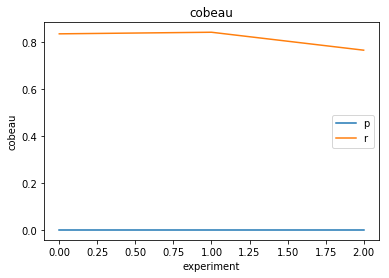

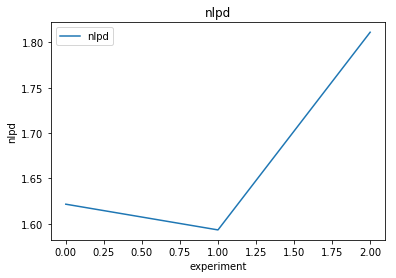

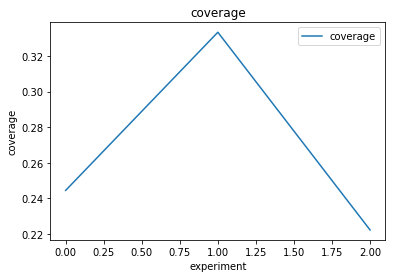

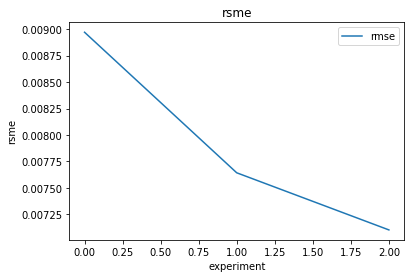

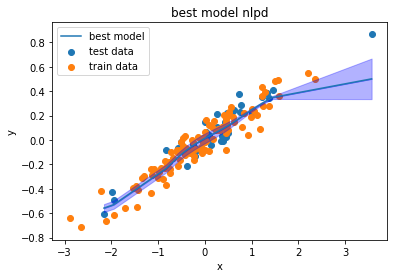

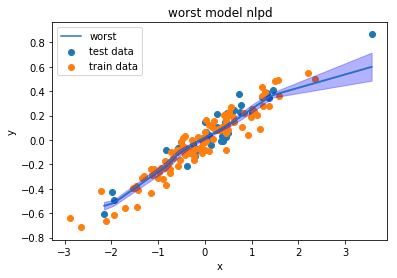

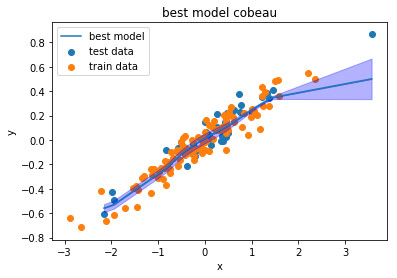

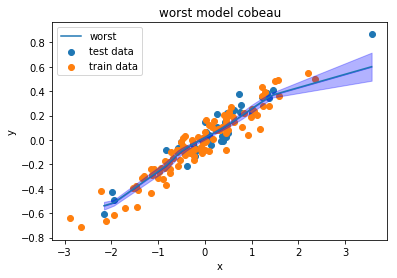

In [3]:
pd = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-08 23:15:01.354336
experiment number 1 took 45.67355918884277 seconds. That means the whole run will probably take 137.02067756652832 more seconds and 2.2836779594421386 more minutes.
overall, it took 136.9521210193634 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.000181  0.918519  0.483610  0.052455
std    0.000160  0.105018  0.270353  0.020315
min    0.000086  0.800000  0.194100  0.034113
25%    0.000088  0.877778  0.360664  0.041537
50%    0.000091  0.955556  0.527229  0.048960
75%    0.000228  0.977778  0.628365  0.061626
max    0.000365  1.000000  0.729502  0.074291
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.000181 &  0.918519 &  0.483610 &  0.052455 \\
std   &  0.000160 &  0.105018 &  0.270353 &  0.020315 \\
min   &  0.000086 &  0.800000 &  0.194100 & 

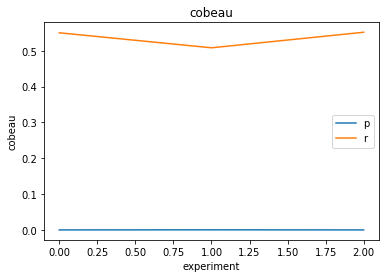

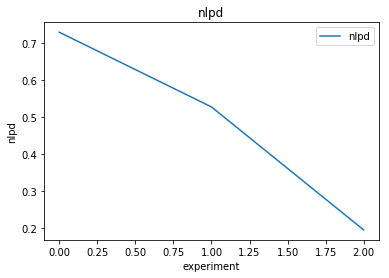

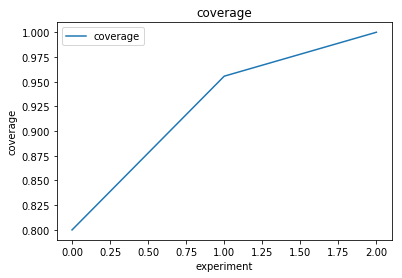

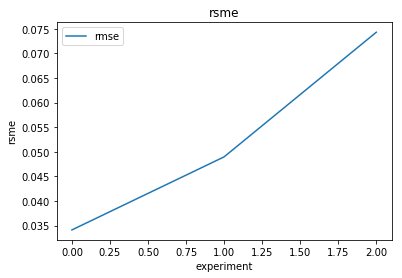

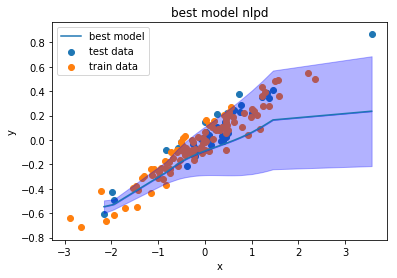

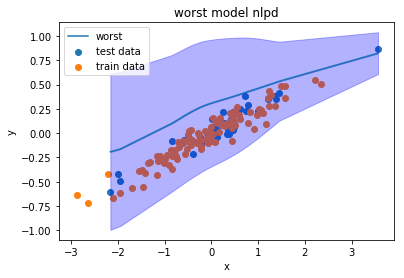

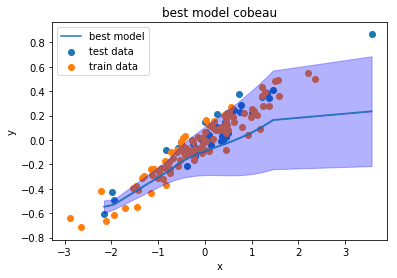

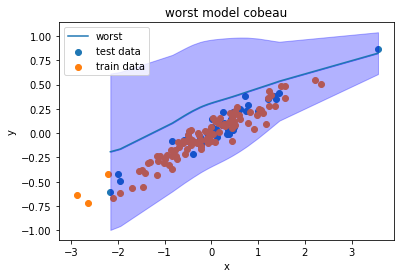

In [4]:
pd1 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-08 23:17:22.877685
experiment number 1 took 36.74075102806091 seconds. That means the whole run will probably take 110.22225308418274 more seconds and 1.8370375514030457 more minutes.
overall, it took 126.09385228157043 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.144288  0.948148  0.501349  0.007725
std    0.114139  0.046259  0.303374  0.001461
min    0.039423  0.911111  0.171880  0.006116
25%    0.083502  0.922222  0.367448  0.007102
50%    0.127580  0.933333  0.563015  0.008088
75%    0.196720  0.966667  0.666084  0.008529
max    0.265860  1.000000  0.769152  0.008969
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.144288 &  0.948148 &  0.501349 &  0.007725 \\
std   &  0.114139 &  0.046259 &  0.303374 &  0.001461 \\
min   &  0.039423 &  0.911111 &  0.171880 &

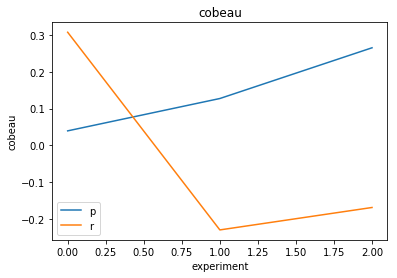

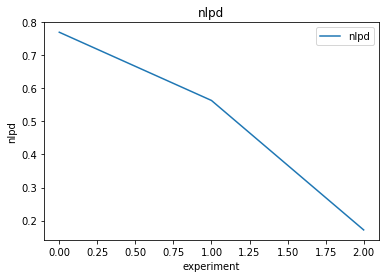

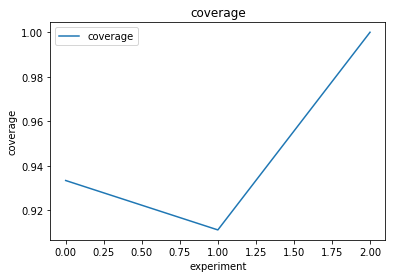

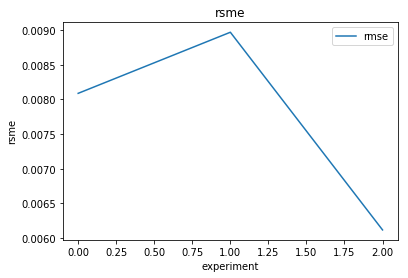

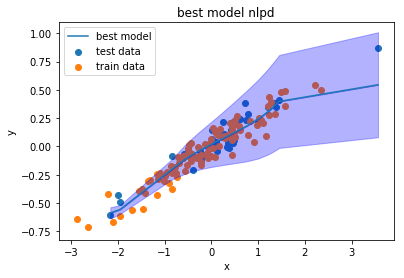

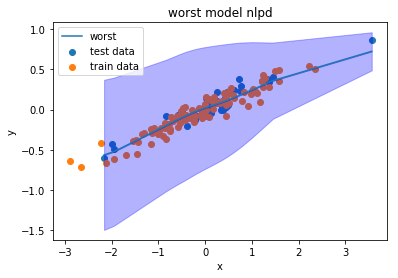

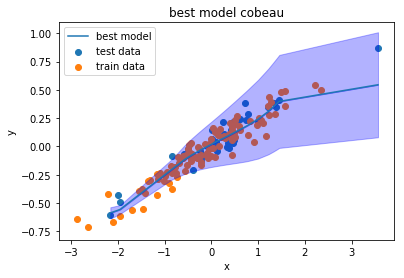

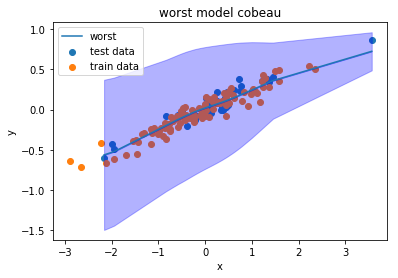

In [5]:
pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [7]:
#num_meta_epochs = 3#10
#num_epochs = 5#50
seed = 42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}

dataset_params = {'num_samples':num_samples,'seed':seed}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-08 23:20:49.322750
experiment number 1 took 33.77131986618042 seconds. That means the whole run will probably take 101.31395959854126 more seconds and 1.688565993309021 more minutes.
overall, it took 88.05814504623413 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   4.123830e-06  0.496296  0.806048  0.053405
std    6.338342e-06  0.144587  0.144465  0.012658
min    3.074357e-07  0.355556  0.686967  0.039630
25%    4.655256e-07  0.422222  0.725694  0.047846
50%    6.236156e-07  0.488889  0.764421  0.056061
75%    6.032028e-06  0.566667  0.865589  0.060292
max    1.144044e-05  0.644444  0.966757  0.064524
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  4.123830e-06 &  0.496296 &  0.806048 &  0.053405 \\
std   &  6.338342e-06 &  0.144587 &  0.144465 &  0.012

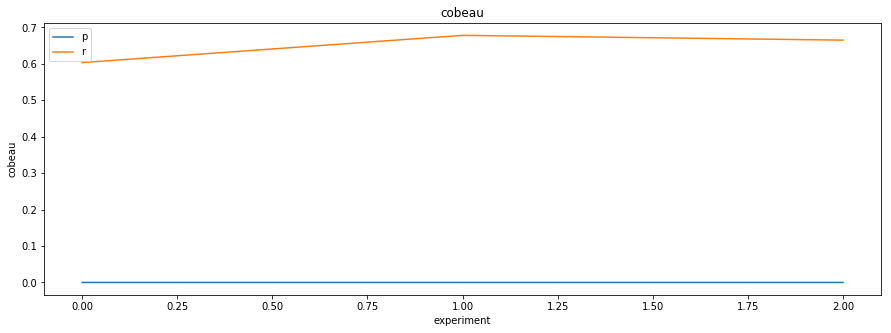

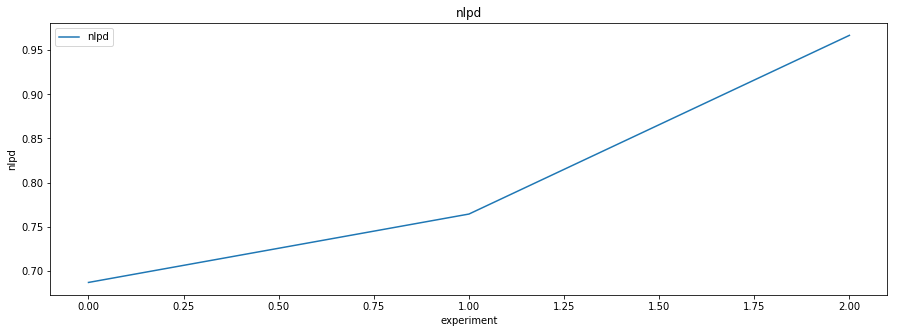

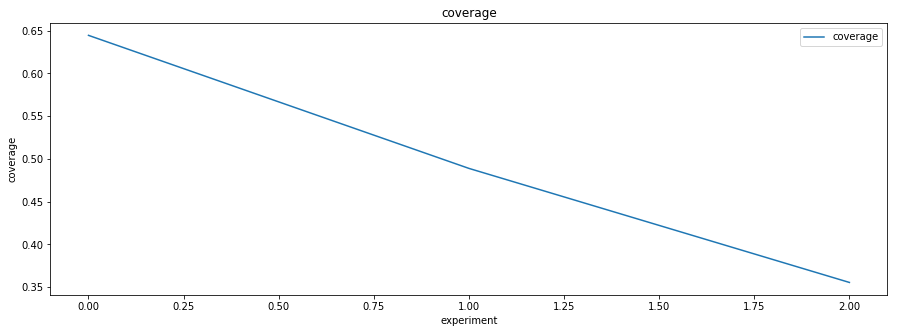

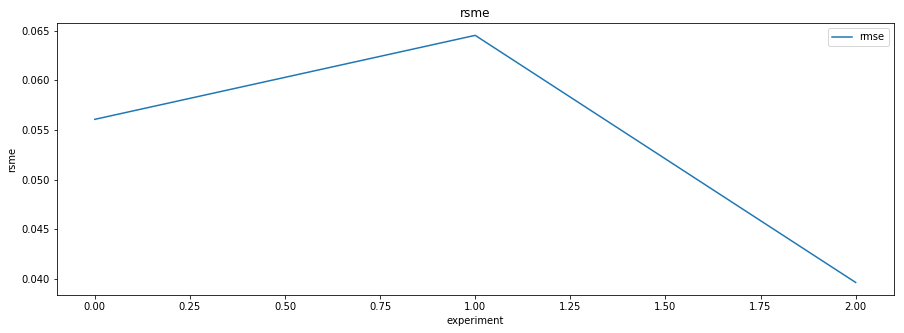

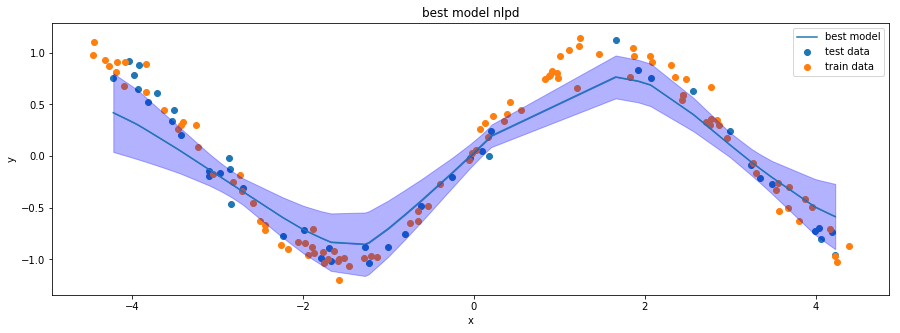

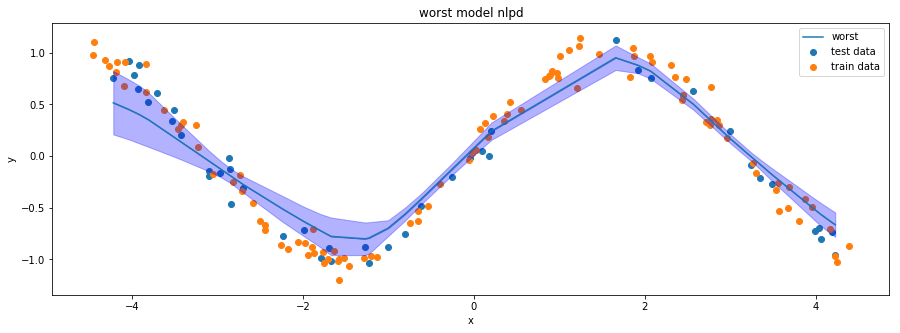

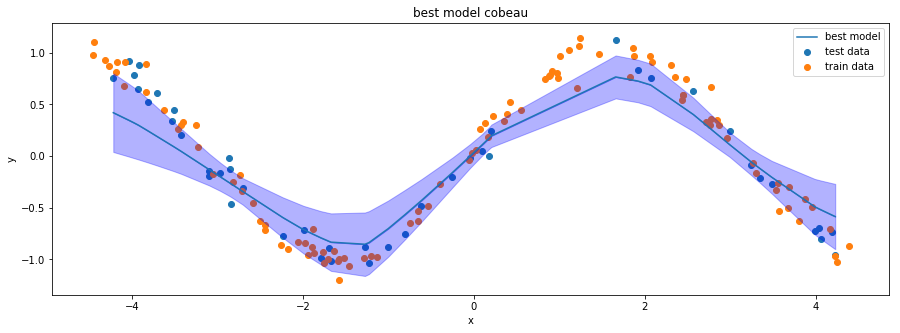

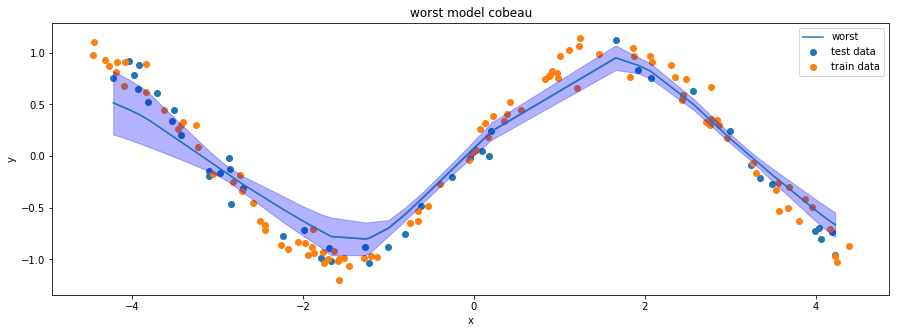

In [8]:
pd11 = repeat_experiment(BootstrapEnsemble, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-08 23:22:22.275276
experiment number 1 took 43.20039105415344 seconds. That means the whole run will probably take 129.60117316246033 more seconds and 2.160019552707672 more minutes.
overall, it took 139.19724798202515 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   6.961625e-07  0.866667  0.155539  0.709953
std    1.198644e-06  0.115470  0.878185  1.150044
min    2.288143e-11  0.800000 -0.854737  0.030059
25%    4.129084e-09  0.800000 -0.134833  0.046039
50%    8.235288e-09  0.800000  0.585070  0.062020
75%    1.044232e-06  0.900000  0.660677  1.049900
max    2.080229e-06  1.000000  0.736283  2.037781
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  6.961625e-07 &  0.866667 &  0.155539 &  0.709953 \\
std   &  1.198644e-06 &  0.115470 &  0.878185 &  1.15

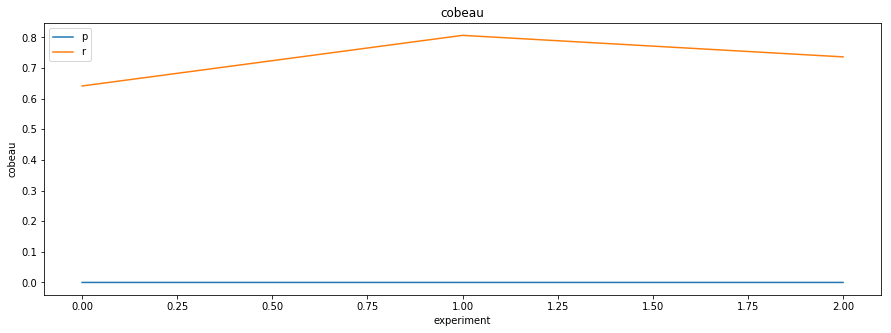

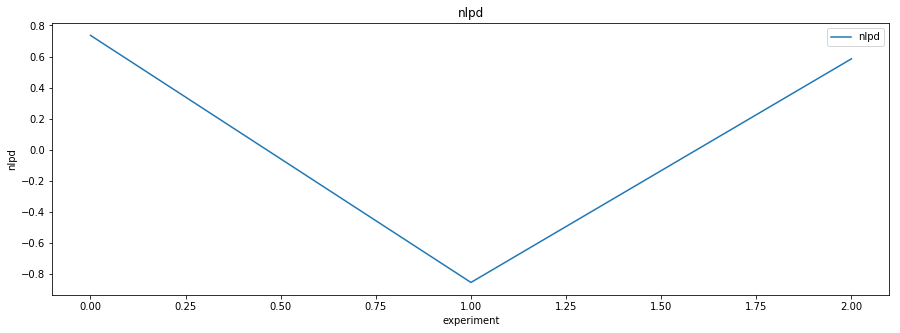

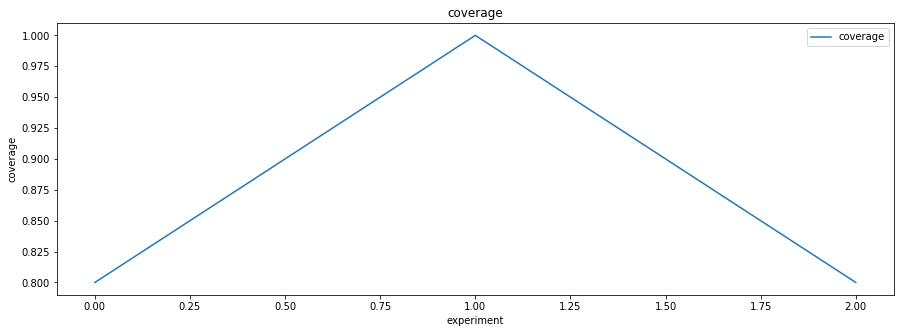

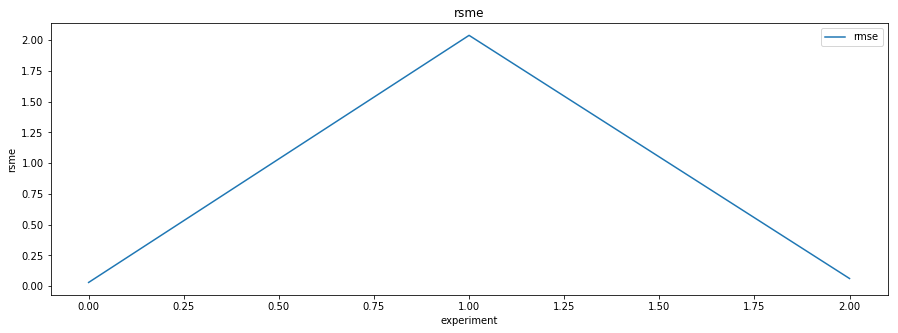

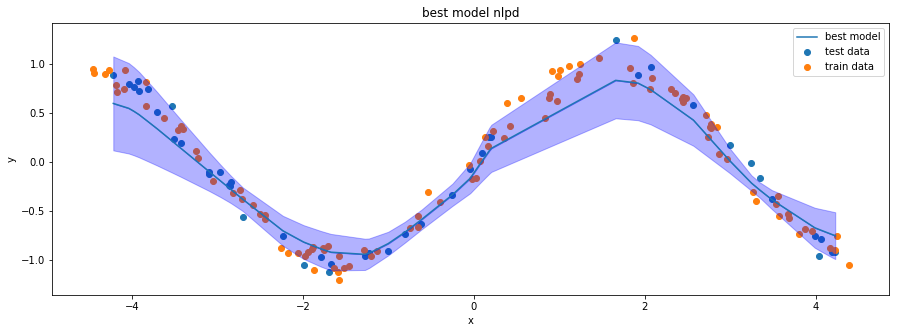

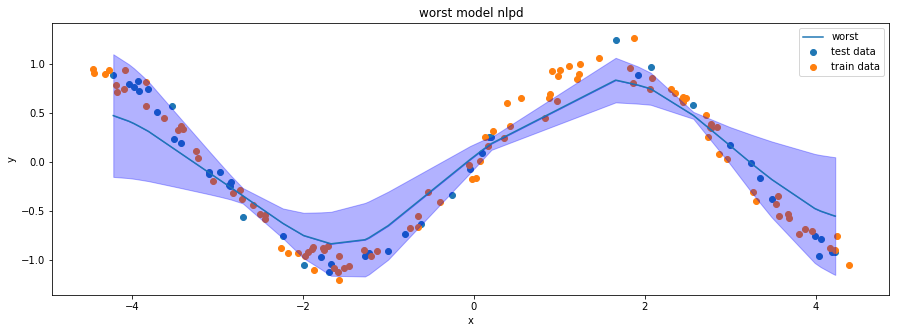

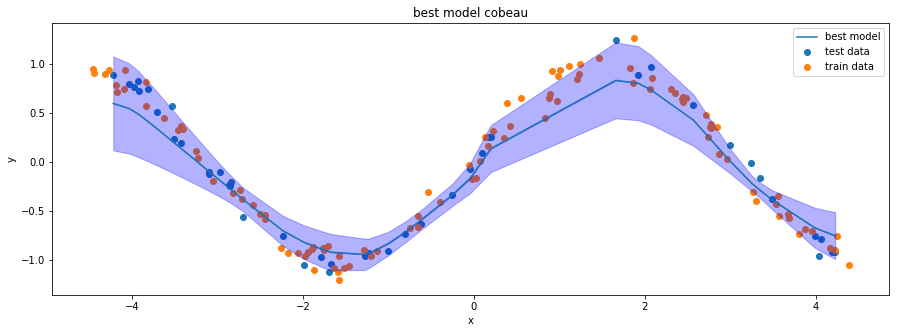

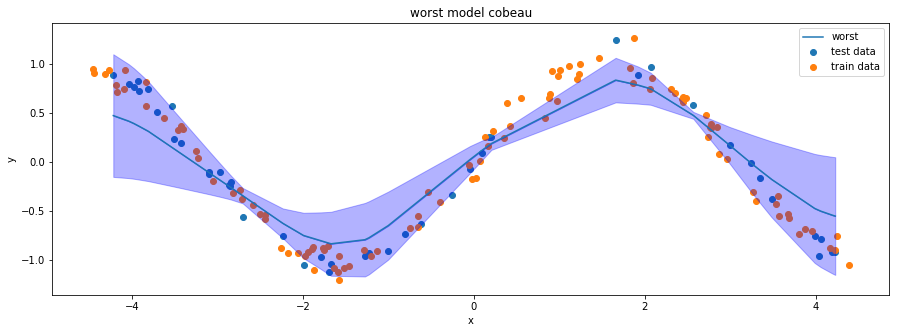

In [9]:
pd22 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-08 23:24:46.565637
experiment number 1 took 45.30966305732727 seconds. That means the whole run will probably take 135.9289891719818 more seconds and 2.2654831528663637 more minutes.
overall, it took 133.80249071121216 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.677910  0.903704  0.318432  0.013069
std    0.410936  0.084132  0.671718  0.000187
min    0.204690  0.844444 -0.455290  0.012954
25%    0.544473  0.855556  0.101441  0.012962
50%    0.884256  0.866667  0.658173  0.012970
75%    0.914519  0.933333  0.705293  0.013127
max    0.944783  1.000000  0.752413  0.013285
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.677910 &  0.903704 &  0.318432 &  0.013069 \\
std   &  0.410936 &  0.084132 &  0.671718 &  0.000187 \\
min   &  0.204690 &  0.844444 & -0.455290 & 

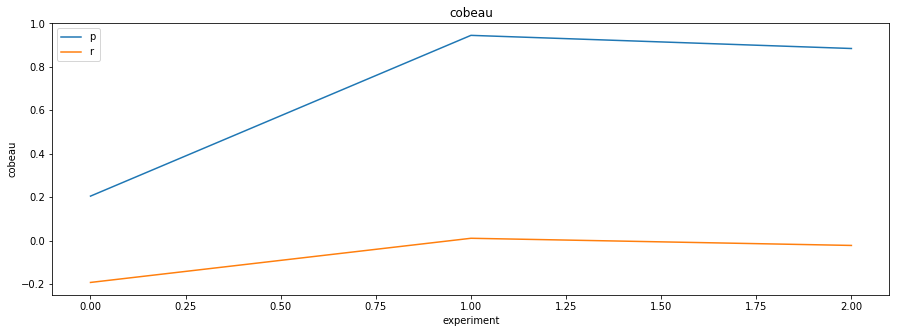

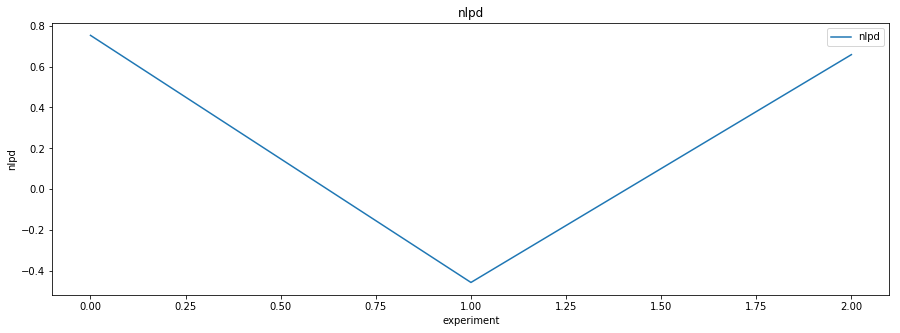

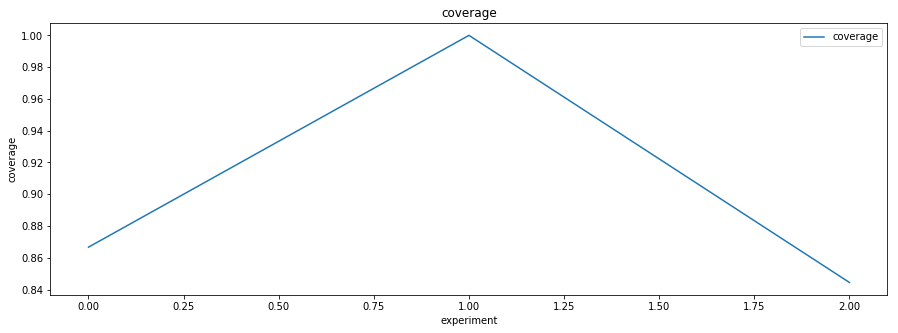

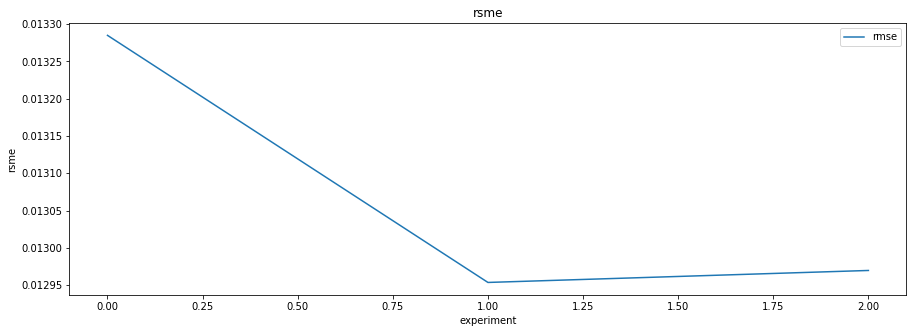

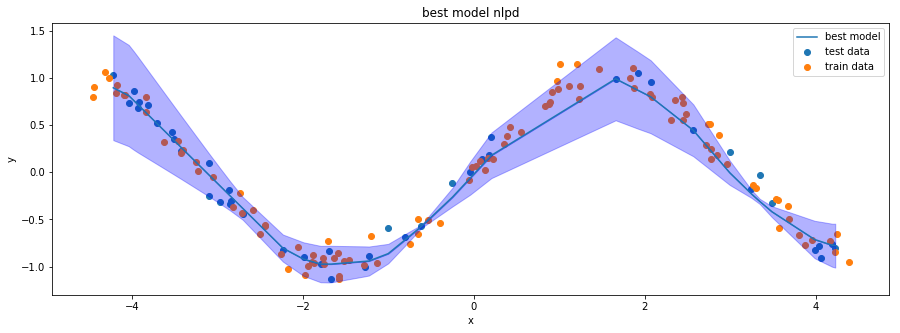

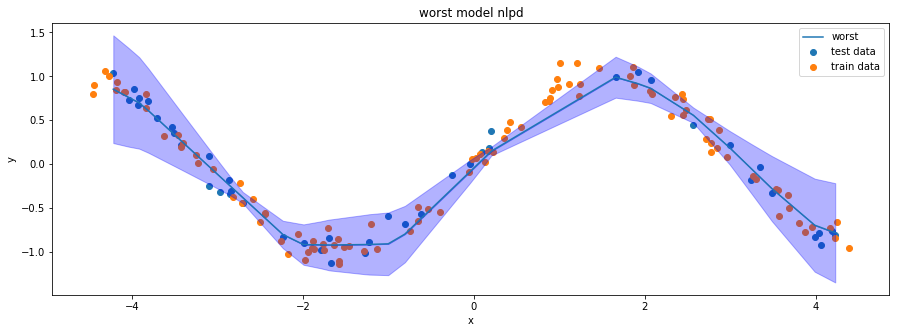

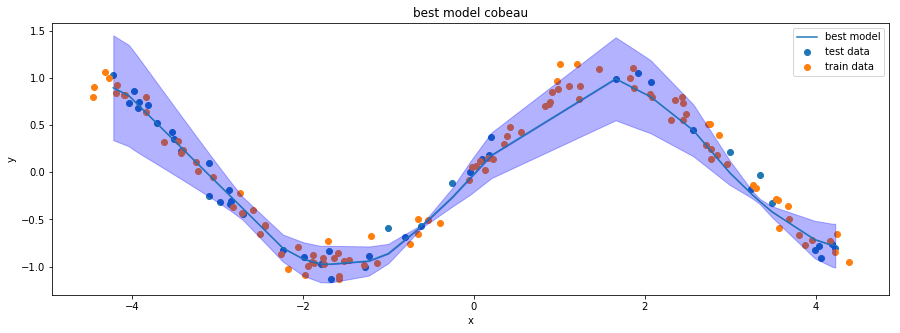

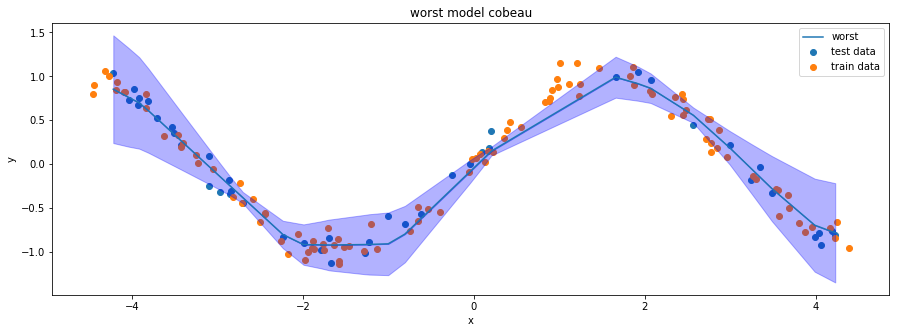

In [10]:
pd33 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

# X3

In [11]:
dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-08 23:27:05.024142
experiment number 1 took 24.240506172180176 seconds. That means the whole run will probably take 72.72151851654053 more seconds and 1.2120253086090087 more minutes.
overall, it took 76.25057196617126 seconds with 3 experiments
         cobeau  coverage      nlpd       rsme
count  3.000000  3.000000  3.000000   3.000000
mean   0.000010  0.577778 -5.250093  51.481440
std    0.000008  0.000000  0.232373   2.539745
min    0.000005  0.577778 -5.408296  48.860362
25%    0.000005  0.577778 -5.383487  50.256572
50%    0.000006  0.577778 -5.358677  51.652781
75%    0.000012  0.577778 -5.170991  52.791978
max    0.000018  0.577778 -4.983306  53.931175
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &       rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &   3.000000 \\
mean  &  0.000010 &  0.577778 & -5.250093 &  51.481440 \\
std   &  0.000008 &  0.000000 &  0.232373 &   2.539745 \\
min   &  0.000005 &  0.577778 &

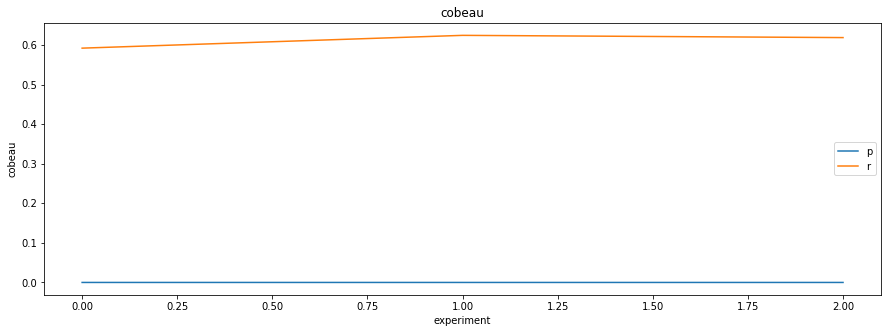

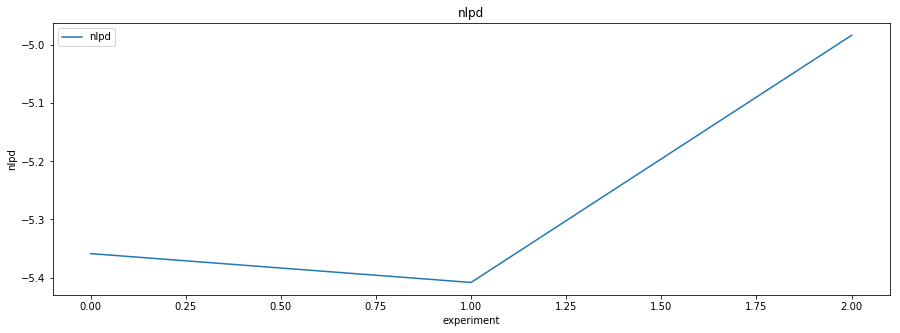

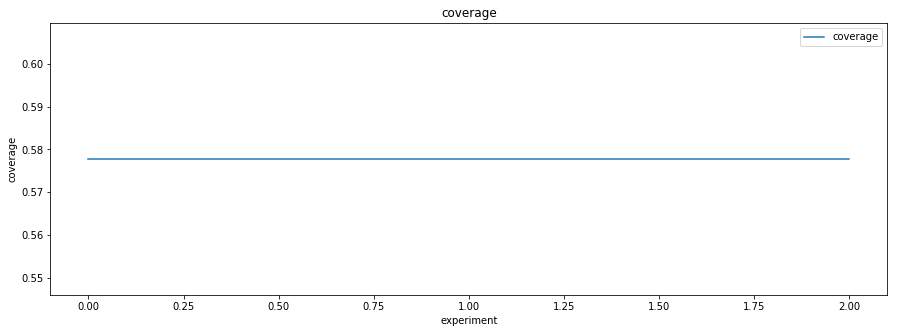

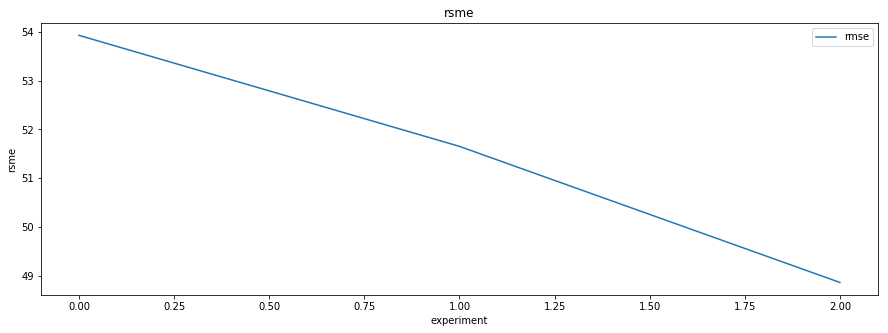

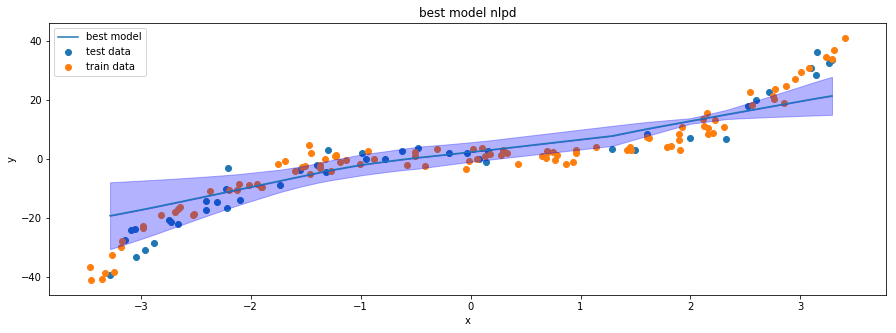

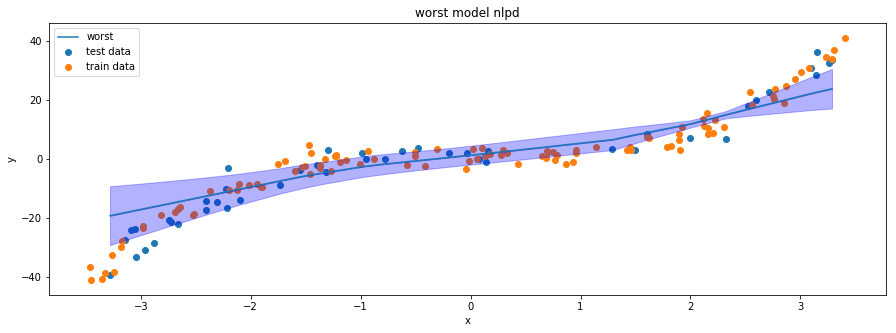

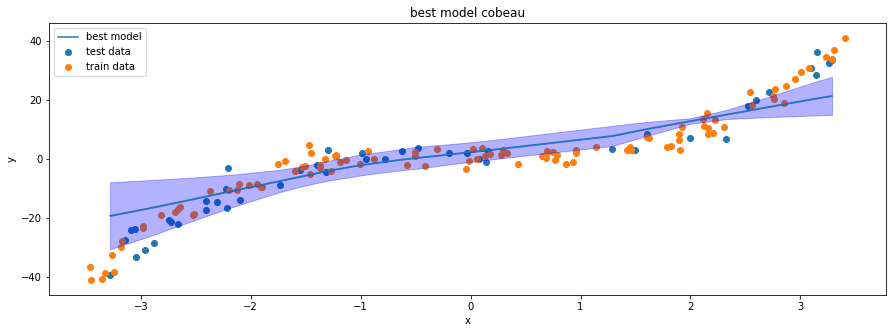

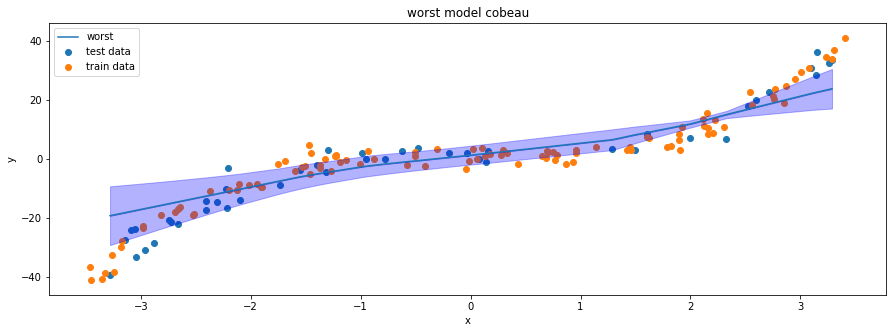

In [12]:
pd111 = repeat_experiment(BootstrapEnsemble, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-08 23:28:26.740281
experiment number 1 took 49.69735503196716 seconds. That means the whole run will probably take 149.0920650959015 more seconds and 2.484867751598358 more minutes.
overall, it took 135.4614701271057 seconds with 3 experiments
         cobeau  coverage      nlpd       rsme
count  3.000000  3.000000  3.000000   3.000000
mean   0.000899  0.674074 -3.551407  29.164638
std    0.000955  0.092518  0.299309   4.242105
min    0.000265  0.600000 -3.895230  24.267923
25%    0.000350  0.622222 -3.652573  27.885485
50%    0.000435  0.644444 -3.409917  31.503048
75%    0.001216  0.711111 -3.379496  31.612996
max    0.001997  0.777778 -3.349074  31.722943
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &       rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &   3.000000 \\
mean  &  0.000899 &  0.674074 & -3.551407 &  29.164638 \\
std   &  0.000955 &  0.092518 &  0.299309 &   4.242105 \\
min   &  0.000265 &  0.600000 & -

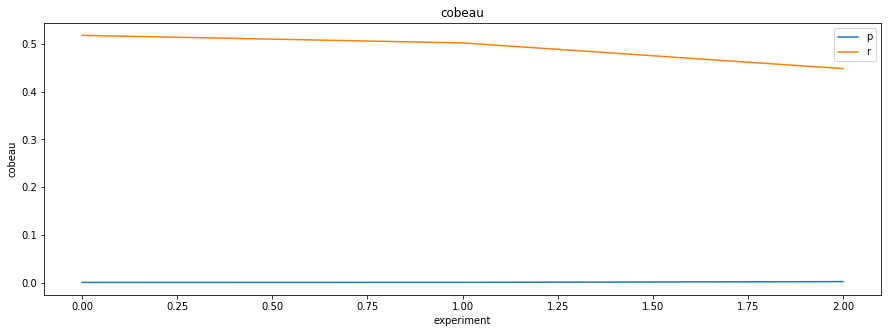

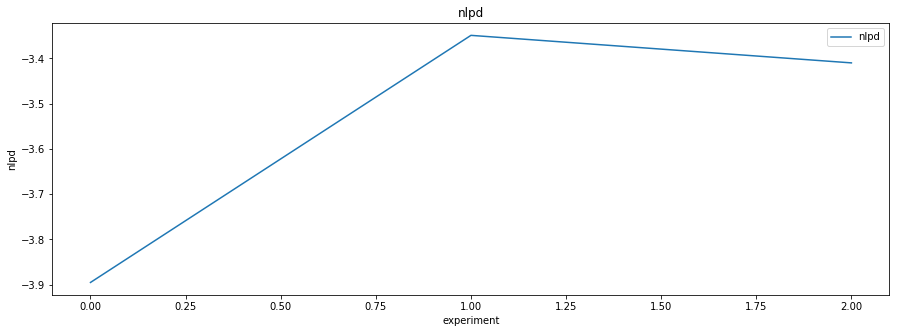

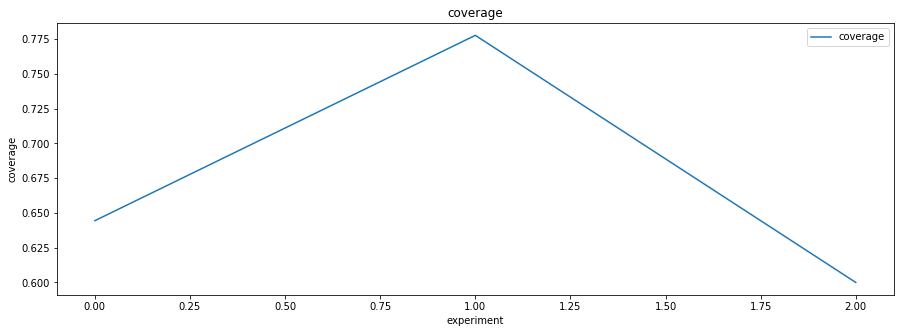

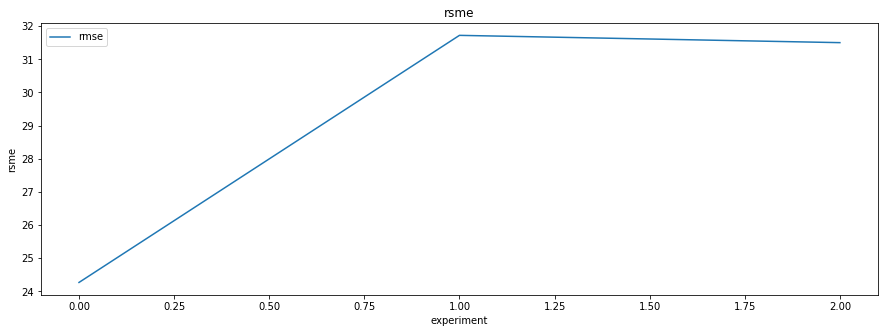

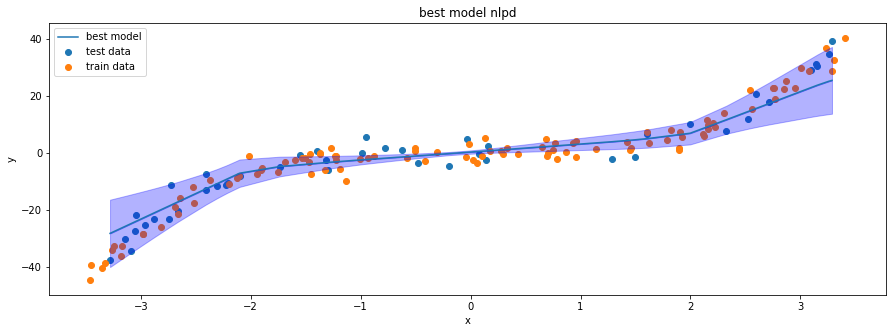

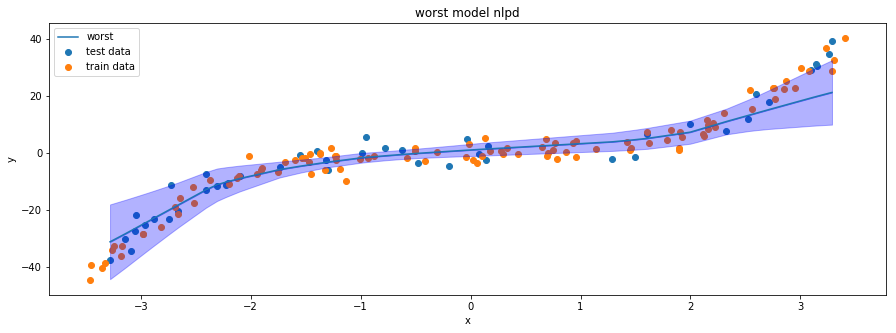

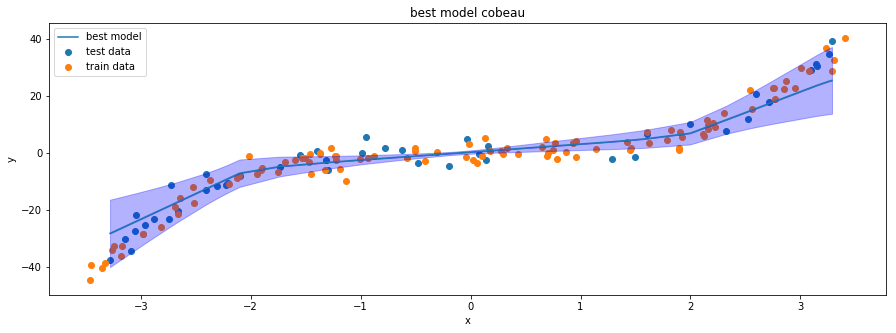

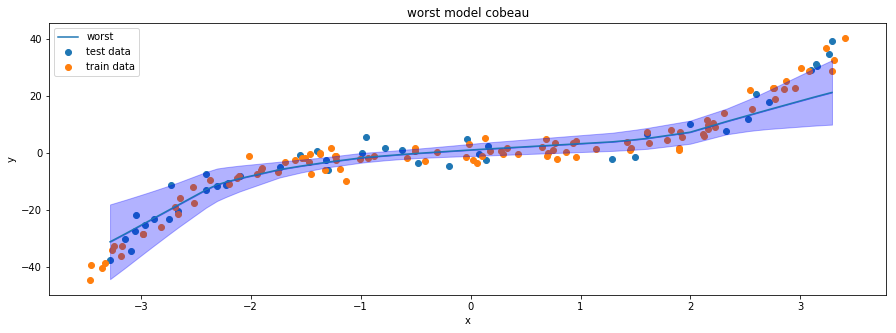

In [13]:
pd222 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-08 23:30:46.940645
experiment number 1 took 36.6830620765686 seconds. That means the whole run will probably take 110.04918622970581 more seconds and 1.8341531038284302 more minutes.
overall, it took 111.15529084205627 seconds with 3 experiments
         cobeau  coverage      nlpd       rsme
count  3.000000  3.000000  3.000000   3.000000
mean   0.513160  0.770370 -2.368182  10.362526
std    0.136303  0.033945  0.392215   0.534130
min    0.374947  0.733333 -2.701909   9.868220
25%    0.446005  0.755556 -2.584187  10.079230
50%    0.517063  0.777778 -2.466464  10.290239
75%    0.582266  0.788889 -2.201318  10.609679
max    0.647469  0.800000 -1.936172  10.929118
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &       rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &   3.000000 \\
mean  &  0.513160 &  0.770370 & -2.368182 &  10.362526 \\
std   &  0.136303 &  0.033945 &  0.392215 &   0.534130 \\
min   &  0.374947 &  0.733333 &

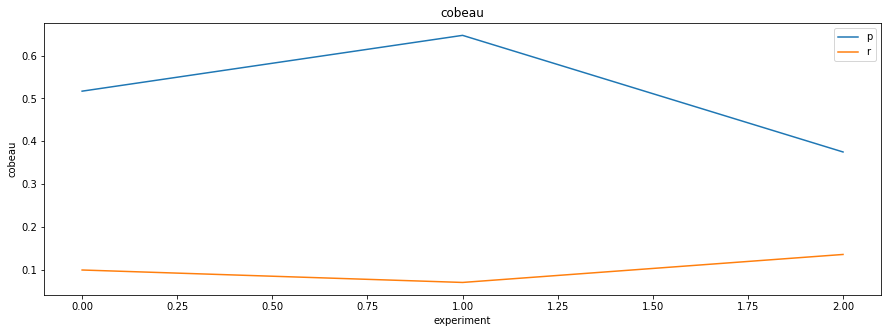

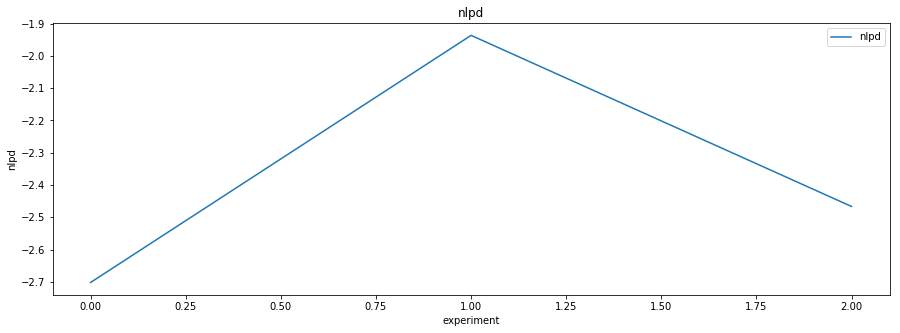

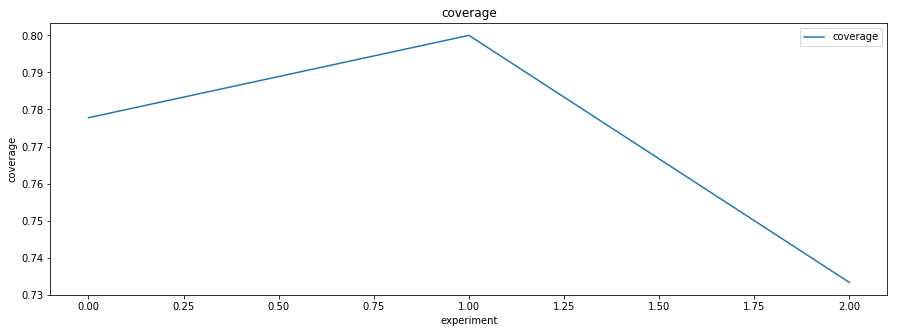

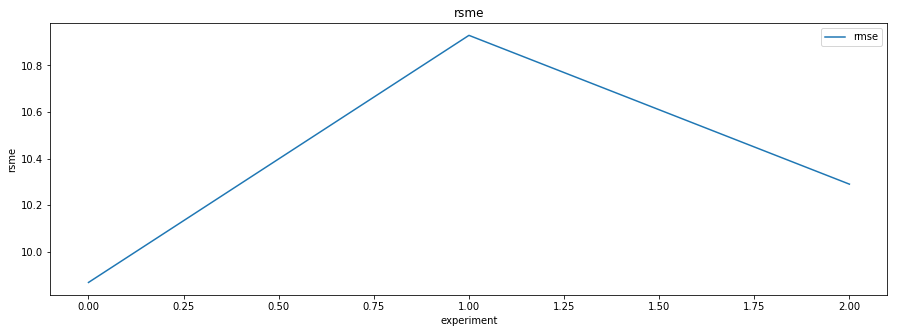

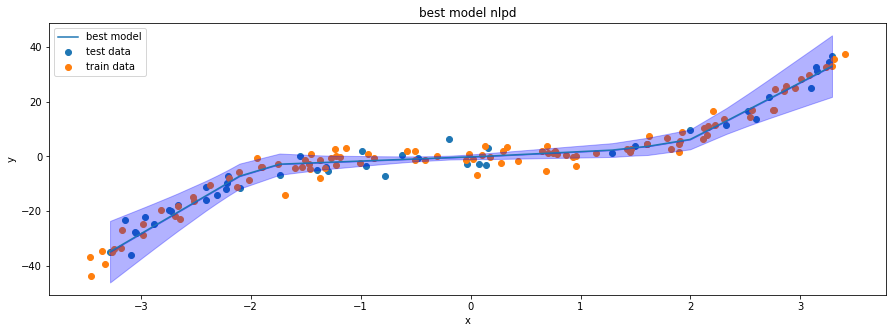

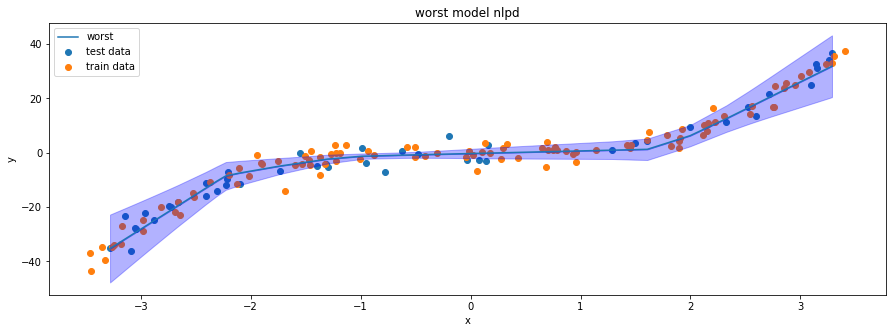

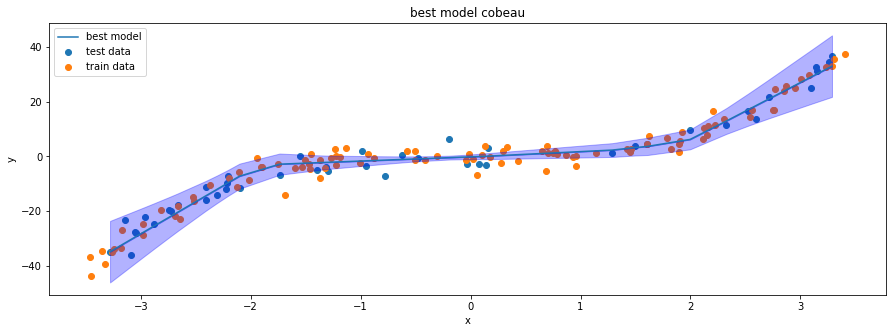

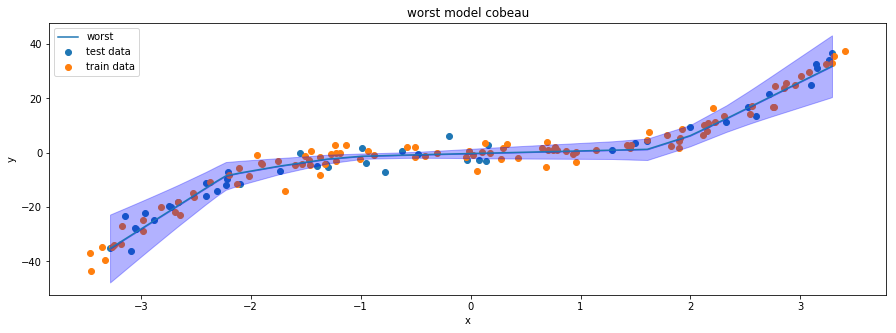

In [14]:
pd333 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)